# linear regression from scratch

<h5>"in this notebook, i'm going to implement linear regression <br> completely from scratch"</h5>
<h5>" this project is all about learning: i built linear<br> regression from scratch to truly understand how it<br>
    works under the hood."</h5>

<h5>" in the final section, i compare my from-scratch implemenation<br>
    with scikit-learn's LinearRegression on the Boston Housing dataset to validate<br>
        correctness and performance"</h5>                            

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

%matplotlib inline

# Boston Housing Dataset
- **CRIM** - per capita crime rate by town
- **ZN** - proportion of residential land zoned for lots over 25,000 sq.ft.
- **INDUS** - proportion of non-retail business acres per town.
- **CHAS** - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- **NOX** - nitric oxides concentration (parts per 10 million)
- **RM** - average number of rooms per dwelling
- **AGE** - proportion of owner-occupied units built prior to 1940
- **DIS** - weighted distances to five Boston employment centres
- **RAD** - index of accessibility to radial highways
- **TAX** - full-value property-tax rate per 10,000 Dollars
- **PTRATIO** -  pupil-teacher ratio by town
- **B** - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- **LSTAT** - % lower status of the population
- **MEDV** - Median value of owner-occupied homes in $1000's

In [2]:
data = pd.read_csv('../data/HousingData.csv')
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


<h5>
Linear regression is fundamentally a mathematical<br><br>
formula that models the relationship between variables.<br><br>
When even a single value is missing (NaN), the<br><br>
calculations break down — it's like trying to compute 5 + ? ...<br><br>
mathematically impossible.
</h5>

In [3]:
data.dropna(inplace=True)

# time to split the data:
- **MEDV** - target variable
-  **Features** -  all remaining columns

In [4]:
x = data.drop("MEDV", axis=1).values
y = data.MEDV.values

<h5>
    "We have to scale our data using sklearn StandardScaler"<br><br>
    "Because features usually have completely different scales<br><br>
    and magnitudes. Without scaling, the feature with larger values<br><br>
    completely dominates the model, while others become almost irrelevant.<br><br>
    Scaling ensurs every feature contribitus fairly, and makes the algorithm <br><br>
    especially gradient descent converge much faster and more stably."
</h5>

In [5]:
sc = StandardScaler()
x = sc.fit_transform(x)

<h5>
    "splitting the dataset into training and testing sets<br><br>
     so we can properly evaluate the model on unseen data."
</h5>

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=12)

<h2>Gradient Descent</h2>

<p>
  Gradient Descent is an optimization method used to reduce a loss function.  
  It works like walking downhill: in each step we move in the direction that 
  decreases the error the most.
</p>

<p>
  The gradient shows the direction of the greatest increase in loss, so we 
  move in the opposite direction to reach a minimum point.
</p>

<pre>
w_new = w_old - η * (∂L/∂w)
</pre>

<p>
  Here, η (learning rate) controls step size, and ∂L/∂w is the gradient.  
  A large η may overshoot the minimum; a very small one makes learning slow.
</p>

<p>
  Gradient Descent is used in many ML models such as linear regression and 
  neural networks.
</p>


<hr>

```python
def fit(self, X, y, learning_rate=0.05, iterations=1000):    
   ```
**Learning rate**
<h5>
    "The learing rate determines the step size taken during<br><br>
    each iteration of gradient descent"<br><br>
    - if the learning rate is too large (e.g., 1.0, or higher),<br><br>
     &ensp;&ensp; the excessively large steps, potentially overshooting<br><br>
     &ensp;&ensp; the minimum and causing the loss to oscillate or even diverge.<br><br>
    - if the learning rate is too small (e.g., 0.0001 or lower), convergence<br><br>
    &ensp;&ensp; becomes extremely slow and may require an impractical number of iterations<br>
</h5>

<hr>

**Iterations**

<h5>
    the number of iterations defines how many times the weight update steps are performed during <br><br>
    gradient descent.<br><br>
    - Too few iterations (e.g., 10-50): The algorithm does not have sufficient time to converge.<br><br>
    &ensp;&ensp; The weights remain far from optimal and the loss stays high<br><br>
    - Sufficient iterations (typically a few hundred to a few thousands): The loss decreases steadliy<br><br>
    &ensp;&ensp; and the parameters gradually approach their optimal values.<br><br>
    - excessive iterations (e.g., hundreds of thousands or millions):
    &ensp;&ensp; After reaching convergence additionals iterations provoide no meaningful<br><br>
    &ensp;&ensp; improvement and only waste computational time.<br><br>
    <p> 
        in this particular implementaion, the loss dropped from approximately 283 to 9.9<br><br>
        within roughly 1,000 iterations and then stabilised. This indicates that 1,000 iterations<br><br>
        were adequate for convergence on the boston Housing dataset
    </p>
</h5>

In [7]:
class SimpleLinearRegression:
    def __init__(self):

        """
            Simple Linear Regression implementation using Gradient Descent.
            
            This class implements linear regression from scratch using numpy,
            training the model through gradient descent optimization.
            
            Attributes:
                parameters (dict): Dictionary containing weights (w1) and bias (b)
                m (int): Number of training samples
            
            Example:
                >>> model = SimpleLinearRegression()
                >>> model.fit(X_train, y_train, learning_rate=0.05, iterations=1000)
                >>> predictions = model.predict(X_test)
        """
        
        self.parameters = dict()
        self.m = None


    def fit(self, X, y, learning_rate=0.05, iterations=1000):
        self.m = X.shape[0] # number of samples
        n_features = X.shape[1] # number of columns in our dataset
        
        # now we are setting the initial value for slope(w1) and y-intercept(b) randomly
        self.parameters["w1"] = np.random.randn(n_features, 1)
        self.parameters["b"] = np.random.randn()
        cost = list()

        # if our target variable is 1D then make it 2D
        
        if len(y.shape) == 1:
            y = y.reshape(-1, 1)

        y_pred = self.predict(X)
        cost.append(self.cost(y_pred, y))

        print(f"cost at iteration number: {1} is: {cost[0]}")

        for i in range(iterations):
            # These two line are the heart of our algorithm
            dw1 = np.dot(X.T, (y_pred - y)) / self.m # This line is calculating the derivative of the cost with respect to the weights.
            
            """The line below computes the derivative (gradient) of the cost function
               with respect to the bias term (intercept).
   
               If the average of the errors is positive, our predictions are higher than 
               the true values, so we need to decrease the bias.
               
               If the average of the errors is negative, our predictions are lower than 
               the true values, so we need to increase the bias.
            """
            db = np.sum(y_pred - y) / self.m 

             # updating parameters
            self.parameters["w1"] -= learning_rate * dw1
            self.parameters["b"] -= learning_rate * db

            y_pred = self.predict(X)
            cost.append(self.cost(y_pred, y))

            if (i + 1) % 100 == 0:
                print(f"cost at iteration number: {i + 1} is: {cost[i]}")

        plt.figure(figsize=(10, 8))    
        plt.title("cost v/s number of iterations")
        plt.xlabel("no. of iterations")
        plt.ylabel("cost")
        plt.plot(cost)

        
    def predict(self, X):

        """"In Algebra, the equation of a line is represented by y = mx + b,
            where m is the slope and b is the y-intercept. Thus,
            algebraists prefer to maintain this format by using
            the form LinReg(ax + b), where a is the slope and b is the y-intercept."
        """
        # w1 is slope and b is the y-intercept
        
        if "w1" not in self.parameters:
             raise ValueError("Model must be trained before making preditions")
        return np.dot(X, self.parameters["w1"]) + self.parameters["b"]

    
    def cost(self, y_predict, y_true):
        return (np.sum(np.square(y_predict.flatten() - y_true.flatten()))) / (self.m * 2) # this line will show the diff between the real values and predicted values

cost at iteration number: 1 is: 244.36874149595295
cost at iteration number: 100 is: 11.80973656477157
cost at iteration number: 200 is: 11.395441594433386
cost at iteration number: 300 is: 11.274268935850886
cost at iteration number: 400 is: 11.223330992486337
cost at iteration number: 500 is: 11.198645774127257
cost at iteration number: 600 is: 11.186016556532921
cost at iteration number: 700 is: 11.179429034174401
cost at iteration number: 800 is: 11.175969216877986
cost at iteration number: 900 is: 11.174147559050589
cost at iteration number: 1000 is: 11.173187530693136


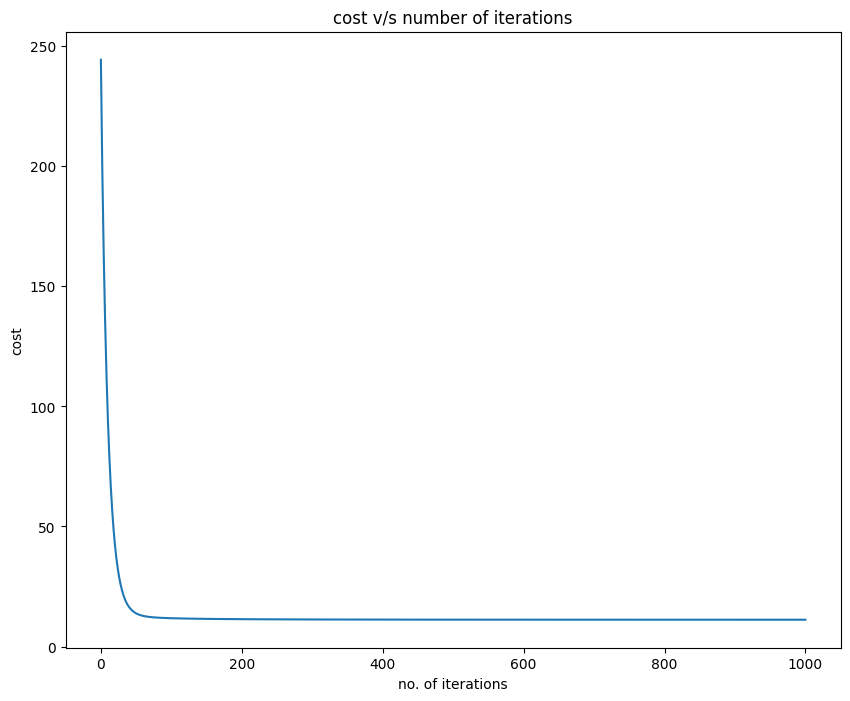

In [8]:
model = SimpleLinearRegression() # creating an object of our class
model.fit(x_train, y_train)

In [9]:
y_pred = model.predict(x_test)

In [10]:
model.cost(y_pred, y_test)

np.float64(1.8289224852299497)

In [11]:
"""In regression, the R2 coefficient of determination is a statistical measure of how well
   the regression predictions approximate the real data points.
   An R2 of 1 indicates that the regression predictions perfectly fit the data.
"""
r2_yours = r2_score(y_test, y_pred)

In [12]:
model_sk = LinearRegression()
model_sk.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [13]:
y_pred_sk = model_sk.predict(x_test)
r2_sklearn = r2_score(y_test, y_pred_sk)

In [14]:
mse_yours = mean_squared_error(y_test, y_pred)
mse_sklearn = mean_squared_error(y_test, y_pred_sk)

Comparison of model performance
R² Score (Your model):   0.8271
R² Score (sklearn):      0.8267
The difference between R²: 0.0005

MSE (Your model): 10.8996
MSE (sklearn): 10.9282
The difference between MSE: 0.0286


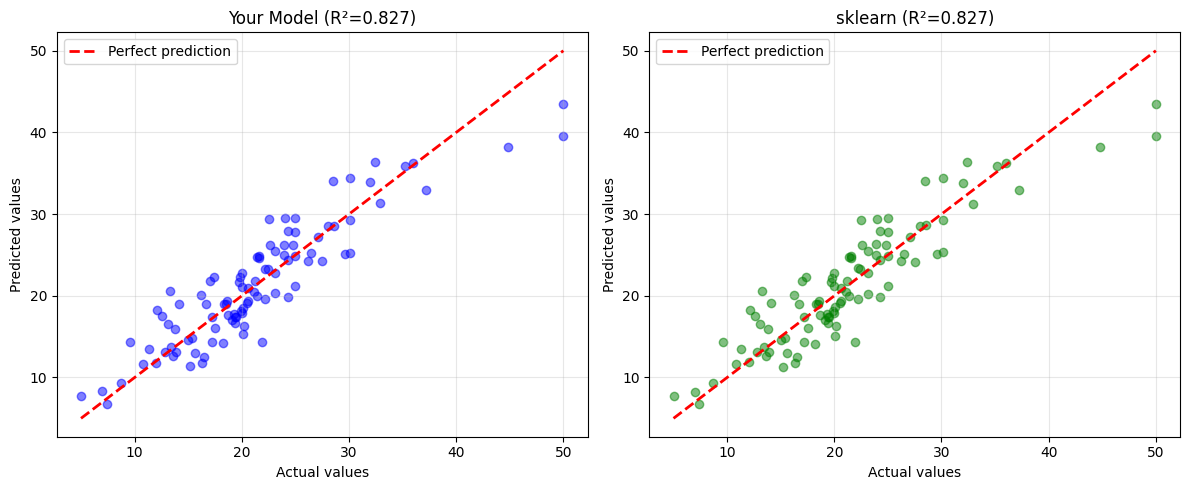

In [15]:
print("Comparison of model performance")
print(f"R² Score (Your model):   {r2_yours:.4f}")
print(f"R² Score (sklearn):      {r2_sklearn:.4f}")
print(f"The difference between R²: {abs(r2_yours - r2_sklearn):.4f}")
print()
print(f"MSE (Your model): {mse_yours:.4f}")
print(f"MSE (sklearn): {mse_sklearn:.4f}")
print(f"The difference between MSE: {abs(mse_yours - mse_sklearn):.4f}")


# Comparison chart 
plt.figure(figsize=(12, 5))

# first chart: Predictions vs Actual - Your Model
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], 
         [y_test.min(), y_test.max()], 
         'r--', lw=2, label='Perfect prediction')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title(f'Your Model (R²={r2_yours:.3f})')
plt.legend()
plt.grid(True, alpha=0.3)

# second chart: sklearn
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_sk, alpha=0.5, color='green')
plt.plot([y_test.min(), y_test.max()], 
         [y_test.min(), y_test.max()], 
         'r--', lw=2, label='Perfect prediction')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title(f'sklearn (R²={r2_sklearn:.3f})')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()